In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car = pd.read_excel('Car features.xlsx')
ins = pd.read_excel('Insurance claim.xlsx')
pol = pd.read_excel('Policy features.xlsx')

In [4]:
# Display the first few rows of the dataset:
car.head()

,policy_id,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2.0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,ID00005,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2.0,No,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2


In [5]:
car

,policy_id,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2.0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,ID00005,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2.0,No,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,1,B2,M6,Petrol,113Nm@4400rpm,NaN,NaN,NaN,NaN,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
58511,ID58512,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2.0,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
58512,ID58513,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2.0,No,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,2
58513,ID58514,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3


In [10]:
# Cleaning max_torque and max_power power columns:
def data_clean(df):
    car["max_torque_Nm"] = car["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    car["max_torque_rpm"] = car["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64') 
    car["max_power_bhp"] = car["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    car["max_power_rpm"] = car["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
data_clean(car)
car

,policy_id,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,ID00001,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
1,ID00002,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
2,ID00003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
3,ID00004,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2.0,Yes,...,Yes,Yes,Yes,Yes,Yes,2,113.0,4400.0,88.50,6000.0
4,ID00005,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2.0,No,...,Yes,No,Yes,Yes,Yes,2,91.0,4250.0,67.06,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,1,B2,M6,Petrol,113Nm@4400rpm,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Yes,2,113.0,4400.0,NaN,NaN
58511,ID58512,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2.0,No,...,Yes,Yes,Yes,Yes,Yes,2,113.0,4400.0,88.50,6000.0
58512,ID58513,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2.0,No,...,Yes,No,No,Yes,Yes,2,82.1,3400.0,55.92,5300.0
58513,ID58514,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.0,Yes,...,Yes,Yes,No,Yes,Yes,3,250.0,2750.0,113.45,4000.0


In [11]:
# Dropping original columns:
car.drop(["max_torque","max_power"],axis=1,inplace=True)
car

,policy_id,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,ID00001,1,A,M1,CNG,F8D Petrol Engine,2.0,No,No,No,...,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
1,ID00002,1,A,M1,CNG,F8D Petrol Engine,2.0,No,No,No,...,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
2,ID00003,1,A,M1,CNG,F8D Petrol Engine,2.0,No,No,No,...,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0
3,ID00004,1,C1,M2,Petrol,1.2 L K12N Dualjet,2.0,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,2,113.0,4400.0,88.50,6000.0
4,ID00005,2,A,M3,Petrol,1.0 SCe,2.0,No,No,No,...,Yes,No,Yes,Yes,Yes,2,91.0,4250.0,67.06,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,1,B2,M6,Petrol,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Yes,2,113.0,4400.0,NaN,NaN
58511,ID58512,1,B2,M6,Petrol,K Series Dual jet,2.0,No,Yes,No,...,Yes,Yes,Yes,Yes,Yes,2,113.0,4400.0,88.50,6000.0
58512,ID58513,1,B1,M8,CNG,K10C,2.0,No,No,No,...,Yes,No,No,Yes,Yes,2,82.1,3400.0,55.92,5300.0
58513,ID58514,3,C2,M4,Diesel,1.5 L U2 CRDi,6.0,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,3,250.0,2750.0,113.45,4000.0


In [12]:
# List all column names:
car.columns.tolist()

['policy_id',
 'make',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'max_torque_Nm',
 'max_torque_rpm',
 'max_power_bhp',
 'max_power_rpm']

In [14]:
# Define the desired column order
my_order = ['policy_id', 'make', 'segment', 'model', 'max_torque_Nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm',
            'fuel_type', 'engine_type', 'airbags', 'is_esc', 'steering_type', 'is_adjustable_steering', 'is_tpms', 
            'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'is_brake_assist', 'displacement', 'cylinder', 
            'transmission_type', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 
            'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',  
            'is_power_door_locks',  'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 
            'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']
# Rearrange columns
car = car[my_order]
car

,policy_id,make,segment,model,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,fuel_type,engine_type,...,is_rear_window_washer,is_rear_window_defogger,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,1,C1,M2,113.0,4400.0,88.50,6000.0,Petrol,1.2 L K12N Dualjet,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,ID00005,2,A,M3,91.0,4250.0,67.06,5500.0,Petrol,1.0 SCe,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,1,B2,M6,113.0,4400.0,NaN,NaN,Petrol,NaN,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
58511,ID58512,1,B2,M6,113.0,4400.0,88.50,6000.0,Petrol,K Series Dual jet,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
58512,ID58513,1,B1,M8,82.1,3400.0,55.92,5300.0,CNG,K10C,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,2
58513,ID58514,3,C2,M4,250.0,2750.0,113.45,4000.0,Diesel,1.5 L U2 CRDi,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3


In [15]:
# Display basic information about the dataset:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58515 entries, 0 to 58514
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58515 non-null  object 
 1   make                              58515 non-null  int64  
 2   segment                           58515 non-null  object 
 3   model                             58515 non-null  object 
 4   max_torque_Nm                     58508 non-null  float64
 5   max_torque_rpm                    58508 non-null  float64
 6   max_power_bhp                     58512 non-null  float64
 7   max_power_rpm                     58512 non-null  float64
 8   fuel_type                         58489 non-null  object 
 9   engine_type                       58512 non-null  object 
 10  airbags                           58506 non-null  float64
 11  is_esc                            58512 non-null  object 
 12  stee

In [16]:
# Many of the columns depend on the car model. So, sorting the data by 'model':
car.sort_values(by='model', inplace=True)
car

,policy_id,make,segment,model,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,fuel_type,engine_type,...,is_rear_window_washer,is_rear_window_defogger,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
20454,ID20455,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
48999,ID49000,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
20449,ID20450,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
20448,ID20449,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56278,ID56279,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
11905,ID11906,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
37467,ID37468,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
4891,ID04892,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4


In [17]:
# Checking for missing values:
car.isnull().sum()

policy_id                            0
make                                 0
segment                              0
model                                0
max_torque_Nm                        7
max_torque_rpm                       7
max_power_bhp                        3
max_power_rpm                        3
fuel_type                           26
engine_type                          3
airbags                              9
is_esc                               3
steering_type                        0
is_adjustable_steering               7
is_tpms                              3
is_parking_sensors                   7
is_parking_camera                    3
rear_brakes_type                     0
is_brake_assist                      0
displacement                         7
cylinder                             7
transmission_type                    0
gear_box                             0
turning_radius                       0
length                               0
width                    

In [18]:
# There are many missing values in the following columns: 
# max_torque_Nm                        7
# max_torque_rpm                       7
# max_power_bhp                        3
# max_power_rpm                        3
# fuel_type                           26
# engine_type                          3
# airbags                              9
# is_esc                               3
# steering_type                        0
# is_adjustable_steering               7
# is_tpms                              3
# is_parking_sensors                   7
# is_parking_camera                    3
# rear_brakes_type                     0
# is_brake_assist                      0
# displacement                         7
# cylinder                             7
# All these depend on the car model. So, we can fill the missing datas on the basis of the car model:

car['fuel_type'] = car.groupby('model')['fuel_type'].ffill()
car['max_torque_Nm'] = car.groupby('model')['max_torque_Nm'].ffill()
car['max_torque_rpm'] = car.groupby('model')['max_torque_rpm'].ffill()
car['max_power_bhp'] = car.groupby('model')['max_power_bhp'].ffill()
car['max_power_rpm'] = car.groupby('model')['max_power_rpm'].ffill()
car['engine_type'] = car.groupby('model')['engine_type'].ffill()
car['airbags'] = car.groupby('model')['airbags'].ffill()
car['is_adjustable_steering'] = car.groupby('model')['is_adjustable_steering'].ffill()
car['is_parking_camera'] = car.groupby('model')['is_parking_camera'].ffill()
car['is_parking_sensors'] = car.groupby('model')['is_parking_sensors'].ffill()
car['cylinder'] = car.groupby('model')['cylinder'].ffill()
car['displacement'] = car.groupby('model')['displacement'].ffill()
car['is_tpms'] = car.groupby('model')['is_tpms'].ffill()
car['is_esc'] = car.groupby('model')['is_esc'].ffill()
car

,policy_id,make,segment,model,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,fuel_type,engine_type,...,is_rear_window_washer,is_rear_window_defogger,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
20454,ID20455,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
48999,ID49000,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
20449,ID20450,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
20448,ID20449,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56278,ID56279,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
11905,ID11906,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
37467,ID37468,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
4891,ID04892,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4


In [19]:
# Now checking if all missing values are filled:
car.isnull().sum()

policy_id                           0
make                                0
segment                             0
model                               0
max_torque_Nm                       0
max_torque_rpm                      0
max_power_bhp                       0
max_power_rpm                       0
fuel_type                           0
engine_type                         0
airbags                             0
is_esc                              0
steering_type                       0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
is_brake_assist                     0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
turning_radius                      0
length                              0
width                               0
height      

In [20]:
# Saving the new data with no missing values:
# car.to_excel('car_filled.xlsx', index=False)
# car_filled = pd.read_excel('car_filled.xlsx')
# car_filled
# car_filled.isnull().sum()

In [21]:
# Display summary statistics:
car.describe()

,make,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000
mean,1.763479,134.429921,3533.275229,78.969565,5307.416902,3.136324,1162.294899,3.626916,5.245305,4.852805,3850.377510,1672.212287,1553.322960,1385.226198,1.759788
std,1.137011,73.137729,725.907303,27.699034,916.703461,1.832305,266.303012,0.483628,0.430271,0.228039,311.434859,112.092562,79.623606,212.387541,1.389734
min,1.000000,60.000000,1750.000000,40.360000,3600.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,1.000000,60.000000,2750.000000,40.360000,4000.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,1.000000,113.000000,3500.000000,88.500000,6000.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000
75%,3.000000,200.000000,4400.000000,97.890000,6000.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000
max,5.000000,250.000000,4400.000000,118.360000,6000.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000


In [24]:
# Changing yes and no data to 1 and zero so that numerical analysis becomes easy:
# Replace 'Yes' with 1 and 'No' with 0:
car['is_esc'] = car['is_esc'].replace({'Yes': 1, 'No': 0})
car['is_adjustable_steering'] = car['is_adjustable_steering'].replace({'Yes': 1, 'No': 0})
car['is_tpms'] = car['is_tpms'].replace({'Yes': 1, 'No': 0})
car['is_parking_sensors'] = car['is_parking_sensors'].replace({'Yes': 1, 'No': 0})
car['is_parking_camera'] = car['is_parking_camera'].replace({'Yes': 1, 'No': 0})
car['is_front_fog_lights'] = car['is_front_fog_lights'].replace({'Yes': 1, 'No': 0})
car['is_rear_window_wiper'] = car['is_rear_window_wiper'].replace({'Yes': 1, 'No': 0})
car['is_rear_window_washer'] = car['is_rear_window_washer'].replace({'Yes': 1, 'No': 0})
car['is_rear_window_defogger'] = car['is_rear_window_defogger'].replace({'Yes': 1, 'No': 0})
car['is_brake_assist'] = car['is_brake_assist'].replace({'Yes': 1, 'No': 0})
car['is_power_door_locks'] = car['is_power_door_locks'].replace({'Yes': 1, 'No': 0})
car['is_central_locking'] = car['is_central_locking'].replace({'Yes': 1, 'No': 0})
car['is_power_steering'] = car['is_power_steering'].replace({'Yes': 1, 'No': 0})
car['is_driver_seat_height_adjustable'] = car['is_driver_seat_height_adjustable'].replace({'Yes': 1, 'No': 0})
car['is_day_night_rear_view_mirror'] = car['is_day_night_rear_view_mirror'].replace({'Yes': 1, 'No': 0})
car['is_ecw'] = car['is_ecw'].replace({'Yes': 1, 'No': 0})
car['is_speed_alert'] = car['is_speed_alert'].replace({'Yes': 1, 'No': 0})

car

,policy_id,make,segment,model,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,fuel_type,engine_type,...,is_rear_window_washer,is_rear_window_defogger,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,0,0,0,0,1,0,0,0,1,0
20454,ID20455,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,0,0,0,0,1,0,0,0,1,0
48999,ID49000,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,0,0,0,0,1,0,0,0,1,0
20449,ID20450,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,0,0,0,0,1,0,0,0,1,0
20448,ID20449,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56278,ID56279,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,0,1,1,1,1,1,1,1,1,4
11905,ID11906,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,0,1,1,1,1,1,1,1,1,4
37467,ID37468,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,0,1,1,1,1,1,1,1,1,4
4891,ID04892,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,...,0,1,1,1,1,1,1,1,1,4


In [26]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58515 entries, 0 to 4356
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58515 non-null  object 
 1   make                              58515 non-null  int64  
 2   segment                           58515 non-null  object 
 3   model                             58515 non-null  object 
 4   max_torque_Nm                     58515 non-null  float64
 5   max_torque_rpm                    58515 non-null  float64
 6   max_power_bhp                     58515 non-null  float64
 7   max_power_rpm                     58515 non-null  float64
 8   fuel_type                         58515 non-null  object 
 9   engine_type                       58515 non-null  object 
 10  airbags                           58515 non-null  float64
 11  is_esc                            58515 non-null  int64  
 12  steer

In [35]:
# Changing data type of columns:
# df['Column'] = df['Column'].astype(int)
# Not needed as the data type are proper

In [36]:
# Basic Statistics
car['model'].value_counts()

M1     14934
M4     13991
M6     13763
M8      4168
M7      2934
M3      2366
M9      2111
M5      1598
M10     1208
M2      1079
M11      363
Name: model, dtype: int64

In [90]:
# Create a new DataFrame with distinct values
# model_df = pd.DataFrame({'model': car['model'].unique()})
# model_df

In [91]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Extract the numeric part of the 'model' column and convert to integers
    car_unique['model_numeric'] = car_unique['model'].str.extract('(\d+)').astype(int)
    # Sort the DataFrame based on both the numeric and string parts of 'model'
    car_unique_sorted = car_unique.sort_values(by=['model_numeric', 'model'], ascending=[True, True])
    # Drop the temporary 'model_numeric' column if you don't need it
    car_unique_sorted = car_unique_sorted.drop(columns=['model_numeric'])
# Displaying the DataFrame
car_unique_sorted

,make,segment,model,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,fuel_type,engine_type,airbags,...,is_rear_window_washer,is_rear_window_defogger,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,1,A,M1,60.0,3500.0,40.36,6000.0,CNG,F8D Petrol Engine,2.0,...,0,0,0,0,1,0,0,0,1,0
6211,1,C1,M2,113.0,4400.0,88.50,6000.0,Petrol,1.2 L K12N Dualjet,2.0,...,0,1,1,1,1,1,1,1,1,2
29214,2,A,M3,91.0,4250.0,67.06,5500.0,Petrol,1.0 SCe,2.0,...,0,0,1,1,1,0,1,1,1,2
56463,3,C2,M4,250.0,2750.0,113.45,4000.0,Diesel,1.5 L U2 CRDi,6.0,...,1,1,1,1,1,1,0,1,1,3
40715,4,B2,M5,200.0,3000.0,88.77,4000.0,Diesel,1.5 Turbocharged Revotorq,2.0,...,0,0,1,1,1,0,0,1,1,5
40031,1,B2,M6,113.0,4400.0,88.50,6000.0,Petrol,K Series Dual jet,2.0,...,0,0,1,1,1,1,1,1,1,2
32389,1,B2,M7,113.0,4400.0,88.50,6000.0,Petrol,1.2 L K Series Engine,6.0,...,1,1,1,1,1,1,1,1,1,0
6223,1,B1,M8,82.1,3400.0,55.92,5300.0,CNG,K10C,2.0,...,0,0,1,1,1,0,0,1,1,2
39706,5,C1,M9,200.0,1750.0,97.89,3600.0,Diesel,i-DTEC,2.0,...,0,1,1,1,1,1,1,1,1,4
8536,1,Utility,M10,85.0,3000.0,61.68,6000.0,CNG,G12B,1.0,...,0,0,0,0,0,0,0,0,1,0


<Figure size 1440x1152 with 0 Axes>

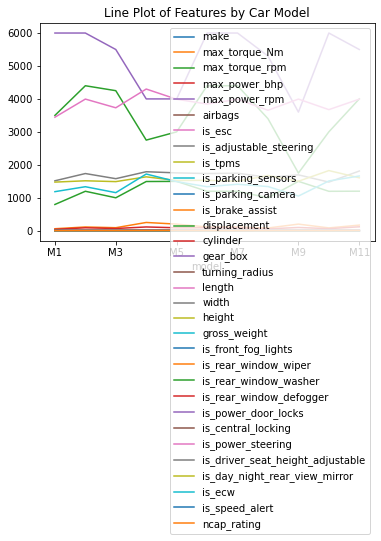

In [113]:
# Analysis:
plt.figure(figsize=(20, 16))
car_unique_sorted.set_index('model').plot(kind='line')
plt.title('Line Plot of Features by Car Model')
plt.show()

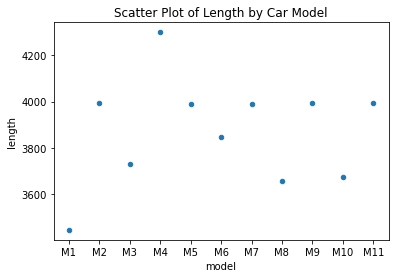

In [122]:
car_unique_sorted.plot(x='model', y=('length'), kind='scatter')
plt.title('Scatter Plot of Length by Car Model')
plt.show()

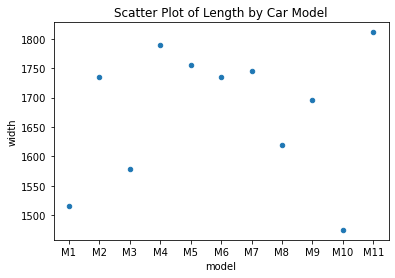

In [116]:
car_unique_sorted.plot(x='model', y='width', kind='scatter')
plt.title('Scatter Plot of Length by Car Model')
plt.show()

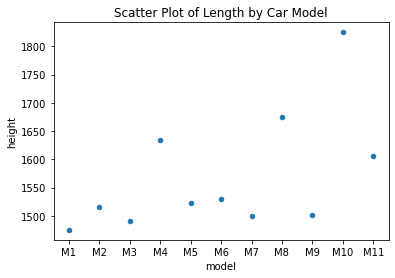

In [117]:
car_unique_sorted.plot(x='model', y='height', kind='scatter')
plt.title('Scatter Plot of Length by Car Model')
plt.show()

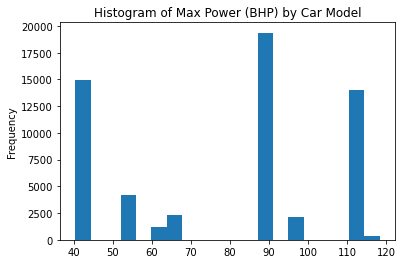

In [123]:
car.set_index('model')['max_power_bhp'].plot(kind='hist', bins=20)
plt.title('Histogram of Max Power (BHP) by Car Model')
plt.show()

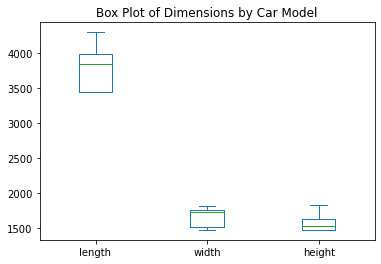

In [125]:
car.set_index('model')[['length', 'width', 'height']].plot(kind='box')
plt.title('Box Plot of Dimensions by Car Model')
plt.show()

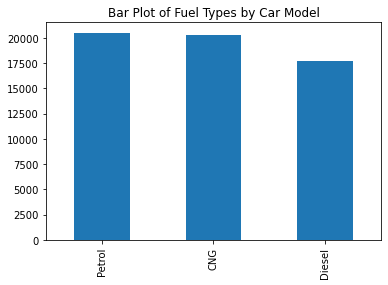

In [126]:
car['fuel_type'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Fuel Types by Car Model')
plt.show()


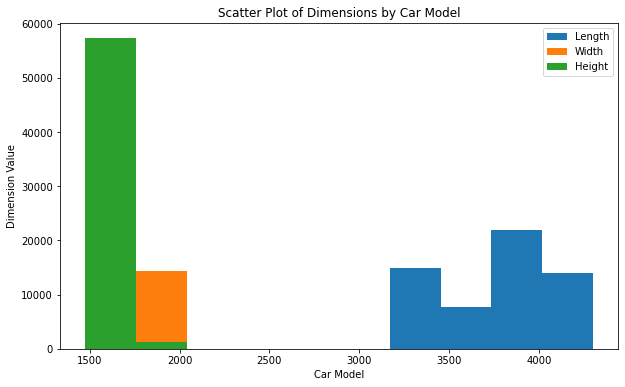

In [127]:
car.plot(x='model', y=['length', 'width', 'height'], kind='hist', figsize=(10, 6))
plt.title('Scatter Plot of Dimensions by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Dimension Value')
plt.legend(['Length', 'Width', 'Height'])
plt.show()

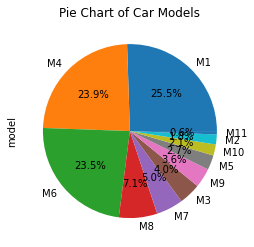

In [98]:
car['model'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Car Models')
plt.show()

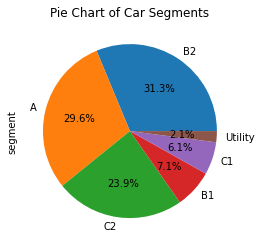

In [99]:
car['segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Car Segments')
plt.show()

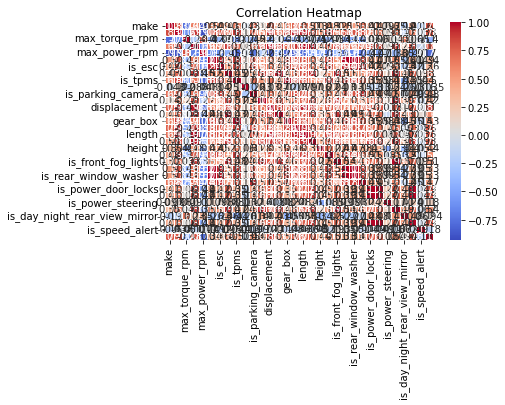

In [100]:
correlation_matrix = car.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

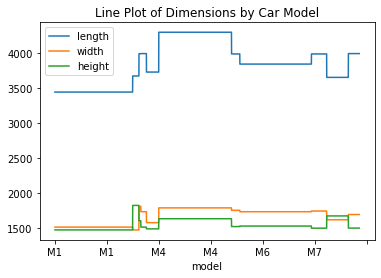

In [101]:
car.plot(x='model', y=['length', 'width', 'height'], kind='line')
plt.title('Line Plot of Dimensions by Car Model')
plt.show()